In [181]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import ml as ml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb

### Preprocessing

In [169]:
# readtest data
df_train = pd.read_csv('mailout_train.csv')

/Users/xiyuewang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [170]:
df_train.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,15.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,0.0,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
3,1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,4.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,53.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In [30]:
attr_dict = ml.get_attribute('DIAS Attributes - Values 2017.xlsx')

Explore the null values, we can see that most columns containing less than 20% nulls.

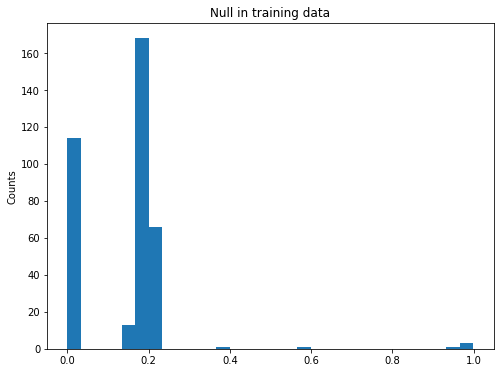

In [177]:
null_columns = df.isnull().sum()/df.shape[0]
plt.figure(figsize=(8, 6))
plt.title('Null in training data')
plt.ylabel('Counts')
plt.hist(null_columns, bins=30);

In [179]:
# clean df remove nulls that has more than 20% nulls
df_clean = ml.clean_data(df_train, attr_dict)

In [182]:
# fill null
df_clean = ml.fill_null(df_clean)

In [184]:
df_clean.isnull().sum().sum()

0

In [185]:
df_clean.shape

(42962, 175)

In [186]:
X = df_clean.drop(['LNR', 'RESPONSE'], axis=1)
y = df_clean['RESPONSE']

In [187]:
X.shape

(42962, 173)

This sample has imbalance problem. USe tomeklinks methods to resample the data. 

In [188]:
# Dealing with the class imbalance
# Use cluster based
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_res, y_res = tl.fit_resample(X, y)

In [189]:
# train test split scale the set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

### AdaBoost

In [95]:
# build model, use adaboost this time
model = build_model(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))

In [190]:
# fit model 
model.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        AdaBoostClassifier(algorithm='SAMME.R',
                                                           base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                                 class_weight=None,
                                                                                                 criterion='gini',
                                                                                                 max_depth=None,
                                                                          


Best Parameters: {'clf__base_estimator__max_depth': 1, 'clf__base_estimator__min_samples_split': 2, 'clf__learning_rate': 0.01, 'clf__n_estimators': 50}
Saving model...


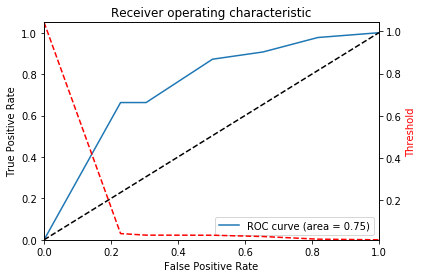

In [191]:
# evaluate the model and save it 
evaluate_model(model, X_test, y_test)

In [143]:
# check accuracy score
y_pred_b = model.predict(X_test)
print(accuracy_score(y_pred_b, y_test))

0.9884399813171415


### Light LGB

In [147]:
model_lgb = lgb.LGBMClassifier(objective='binary', random_state=0)
model_lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': 'binary',
 'random_state': 0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [154]:
# build model and fit
model2 = build_model(model_lgb)
model2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LGBMClassifier(boosting_type='gbdt',
                                                       class_weight=None,
                                                       colsample_bytree=1.0,
                                                       importance_type='split',
                                                       learning_rate=0.1,
                                                       max_depth=-1,
                                                       min_child_samples=20,
                                                       min_child_weight=0.001,
   


Best Parameters: {'clf__boosting_type': 'gbdt', 'clf__learning_rate': 0.1, 'clf__n_estimators': 200, 'clf__num_leaves': 31}
Saving model...


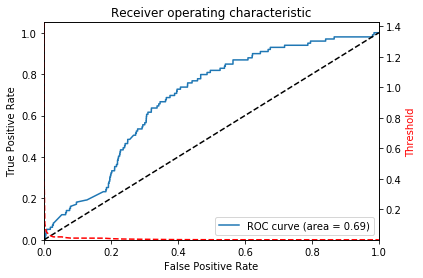

In [155]:
evaluate_model(model2, X_test, y_test)

In [157]:
# check accuracy score
y_pred_b = model2.predict(X_test)
print(accuracy_score(y_pred_b, y_test))

0.9884399813171415


### Make submission

In [193]:
# load test data
df_test = pd.read_csv('mailout_test.csv')

/Users/xiyuewang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [194]:
df_test.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1754,2,1.0,7.0,NaN,NaN,NaN,NaN,6.0,2.0,...,4.0,5.0,6.0,3.0,6.0,9.0,3.0,3,1,4
1,1770,-1,1.0,0.0,NaN,NaN,NaN,NaN,0.0,20.0,...,1.0,5.0,2.0,1.0,6.0,9.0,5.0,3,1,4
2,1465,2,9.0,16.0,NaN,NaN,NaN,NaN,11.0,2.0,...,3.0,9.0,6.0,3.0,2.0,9.0,4.0,3,2,4
3,1470,-1,7.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,...,2.0,6.0,6.0,3.0,NaN,9.0,2.0,3,2,4
4,1478,1,1.0,21.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,4.0,3.0,3.0,9.0,7.0,4,2,4


In [195]:
# clean data and fill nulls
df_test_clean = ml.clean_test(df_test)

In [196]:
cols = df_clean.columns.tolist()
cols.remove('RESPONSE')
df_test_clean = df_test_clean.loc[:,cols]

In [197]:
# fill nas
df_test_clean = ml.fill_null(df_test_clean)

In [198]:
df_test_clean.shape

(42833, 174)

In [199]:
X_tt = df_test_clean.drop('LNR', axis=1)

In [200]:
pred = model.predict_proba(X_tt)

In [201]:
submission = pd.DataFrame({'LNR':df_test_clean.LNR.values, 'RESPONSE':pred[:,1]})
submission.to_csv('ADA.csv', index=False)
submission.head()

,LNR,RESPONSE
0,1754,0.042495
1,1770,0.042495
2,1465,0.028602
3,1470,0.028602
4,1478,0.035125
